# Support Vector Machines

## Loading of the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [2]:
mat = loadmat("ex6data1.mat")
X = mat["X"]
y = mat["y"]

## Plotting of the data

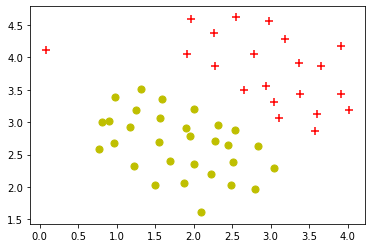

In [3]:
m, n = X.shape[0], X.shape[1]
pos, neg = (y==1).reshape(m,1), (y==0).reshape(m,1)
plt.scatter(X[pos[:,0],0],X[pos[:,0],1],c="r",marker="+",s=50)
plt.scatter(X[neg[:,0],0],X[neg[:,0],1],c="y",marker="o",s=50)
plt.show()

## Using support vector machines

linear kernel 사용으로 1차식 형태의 decision boudary가 그어지게 됨

numpy.ravel() : parameter로 주어진 array의 형태를 1d 형태로 반환  
svm.SVC.fit() : svm모델을 주어진 training data set에 맞춤

In [4]:
from sklearn.svm import SVC
classifier = SVC(kernel="linear")
classifier.fit(X,np.ravel(y))

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## Visualising the  Training set results

numpy.meshrgird() : 사각형 영역을 구성하는 가로축 점들과 세로축 점들을 나타내는 벡터를 인수로 받아 그 조합을 출력, X축 좌표와 Y축 좌표를 나타내는 행렬을 따로 출력한다



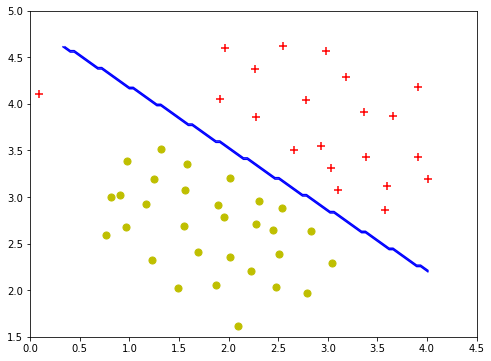

In [5]:
plt.figure(figsize=(8,6))
plt.scatter(X[pos[:,0],0],X[pos[:,0],1],c="r",marker="+",s=50)
plt.scatter(X[neg[:,0],0],X[neg[:,0],1],c="y",marker="o",s=50)

X_1, X_2 = np.meshgrid(np.linspace(X[:,0].min(),X[:,0].max(),num=100),np.linspace(X[:,1].min(),X[:,1].max(),num=100))
plt.contour(X_1,X_2,classifier.predict(np.array([X_1.ravel(),X_2.ravel()]).T).reshape(X_1.shape),1,colors="b")
plt.xlim(0,4.5)
plt.ylim(1.5,5)
plt.show()

In [6]:
classifier2 = SVC(C=100,kernel="linear")
classifier2.fit(X,np.ravel(y))

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

C값을 100으로 설정했기에 hige variacne(overfitting) 발생

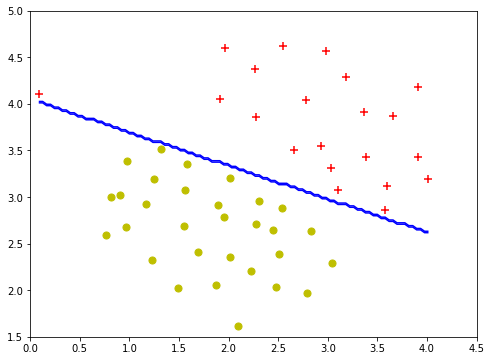

In [7]:
plt.figure(figsize=(8,6))
plt.scatter(X[pos[:,0],0],X[pos[:,0],1],c="r",marker="+",s=50)
plt.scatter(X[neg[:,0],0],X[neg[:,0],1],c="y",marker="o",s=50)

X_3,X_4 = np.meshgrid(np.linspace(X[:,0].min(),X[:,0].max(),num=100),np.linspace(X[:,1].min(),X[:,1].max(),num=100))
plt.contour(X_3,X_4,classifier2.predict(np.array([X_3.ravel(),X_4.ravel()]).T).reshape(X_3.shape),1,colors="b")
plt.xlim(0,4.5)
plt.ylim(1.5,5)
plt.show()

## SVM with gaussian kernels

In [8]:
mat2 = loadmat("ex6data2.mat")
X2 = mat2["X"]
y2 = mat2["y"]

## Plotting of data

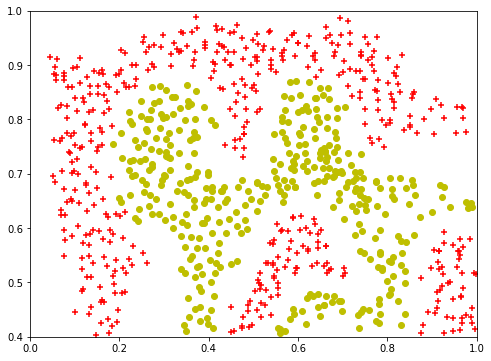

In [9]:
m2, n2 = X2.shape[0],X2.shape[1]
pos2,neg2 = (y2==1).reshape(m2,1), (y2==0).reshape(m2,1)
plt.figure(figsize=(8,6))
plt.scatter(X2[pos2[:,0],0],X2[pos2[:,0],1],c="r",marker="+")
plt.scatter(X2[neg2[:,0],0],X2[neg2[:,0],1],c="y",marker="o")
plt.xlim(0,1)
plt.ylim(0.4,1)
plt.show()

In [10]:
classifier3 = SVC(kernel="rbf", gamma=30)
classifier3.fit(X2,y2.ravel())

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=30, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## Visualising the decision boudnary

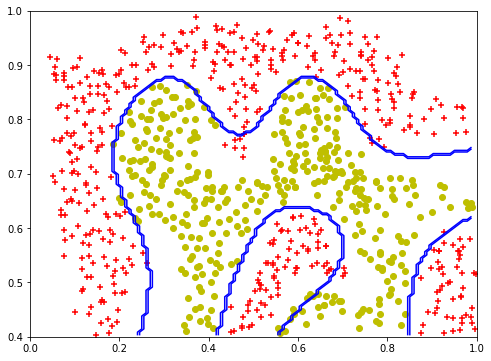

In [11]:
plt.figure(figsize=(8,6))
plt.scatter(X2[pos2[:,0],0],X2[pos2[:,0],1],c="r",marker="+")
plt.scatter(X2[neg2[:,0],0],X2[neg2[:,0],1],c="y",marker="o")

X_5,X_6 = np.meshgrid(np.linspace(X2[:,0].min(),X2[:,1].max(),num=100),np.linspace(X2[:,1].min(),X2[:,1].max(),num=100))
plt.contour(X_5,X_6,classifier3.predict(np.array([X_5.ravel(),X_6.ravel()]).T).reshape(X_5.shape),1,colors="b")
plt.xlim(0,1)
plt.ylim(0.4,1)
plt.show()

## Dataset 3

X3, y3 : training set  

In [12]:
mat3 = loadmat("ex6data3.mat")
X3 = mat3["X"]
y3 = mat3["y"]
Xval = mat3["Xval"]
yval = mat3["yval"]

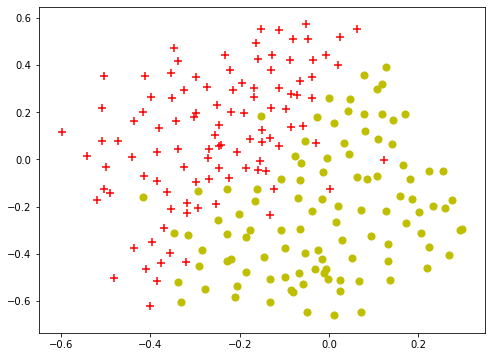

In [13]:
m3,n3 = X3.shape[0],X3.shape[1]
pos3,neg3= (y3==1).reshape(m3,1), (y3==0).reshape(m3,1)
plt.figure(figsize=(8,6))
plt.scatter(X3[pos3[:,0],0],X3[pos3[:,0],1],c="r",marker="+",s=50)
plt.scatter(X3[neg3[:,0],0],X3[neg3[:,0],1],c="y",marker="o",s=50)
plt.show()

## Hyperparameter tuning

validation set을 이용해 다양한 hyper parameter 중 최적의 값을 찾아낸다

svm.SVC.score() : 주어진 데이터셋에 대해 해당 svm의 평균 정확도를 반환

In [14]:
def dataset3Params(X, y, Xval, yval, vals):
    
    acc = 0
    best_c = 0
    best_gamma = 0
    for i in vals:
        C = i
        for j in vals:
            gamma = 1/j
            classifier = SVC(C=C,gamma=gamma)
            classifier.fit(X,y)
            prediction = classifier.predict(Xval)
            score = classifier.score(Xval,yval)
            if score>acc:
                acc = score
                best_c = C
                best_gamma = gamma
                
    return best_c, best_gamma

In [15]:
vals = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
C, gamma = dataset3Params(X3, y3.ravel(), Xval, yval.ravel(), vals)
classifier4 = SVC(C=C, gamma=gamma)
classifier4.fit(X3, y3.ravel())

SVC(C=0.3, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=100.0, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## Plotting the decision boundary

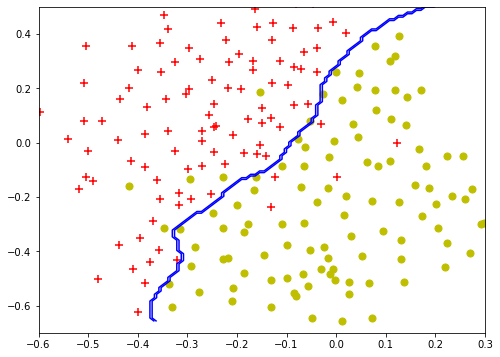

In [16]:
plt.figure(figsize=(8,6))
plt.scatter(X3[pos3[:,0],0],X3[pos3[:,0],1],c="r",marker="+",s=50)
plt.scatter(X3[neg3[:,0],0],X3[neg3[:,0],1],c="y",marker="o",s=50)

X_7, X_8 = np.meshgrid(np.linspace(X3[:,0].min(),X3[:,0].max(),num=100),np.linspace(X3[:,1].min(),X3[:,1].max(),num=100))
plt.contour(X_7, X_8, classifier4.predict(np.array([X_7.ravel(),X_8.ravel()]).T).reshape(X_7.shape),1,colors="b")
plt.xlim(-0.6,0.3)
plt.ylim(-0.7,0.5)
plt.show()

## Spam Classification

nltk : Natural Language Toolkit

vocabList_d에는 단어가 key값으로, 번호가 value로 입력됨 (딕셔너리 자료형) 

In [17]:
import re
from nltk.stem import PorterStemmer

file_contents = open("emailSample1.txt","r").read()
vocabList = open("vocab.txt","r").read()

In [18]:
vocabList = vocabList.split("\n")[:-1]

vocabList_d={}
for ea in vocabList:
    value, key = ea.split("\t")[:]
    vocabList_d[key] = value

In [19]:
file_contents

"> Anyone knows how much it costs to host a web portal ?\n>\nWell, it depends on how many visitors you're expecting.\nThis can be anywhere from less than 10 bucks a month to a couple of $100. \nYou should checkout http://www.rackspace.com/ or perhaps Amazon EC2 \nif youre running something big..\n\nTo unsubscribe yourself from this mailing list, send an email to:\ngroupname-unsubscribe@egroups.com"

## Preprocessing emails

해당 이메일에 들어있는 단어 하나하나의 value를 배열로 만드는 과정

In [20]:
def processEmail(email_contents,vocabList_d):
    email_contents = email_contents.lower()  # Lower case
    email_contents = re.sub("[0-9]+","number",email_contents)  # Handle numbers
    email_contents = re.sub("[http|https]://[^\s]*","httpaddr",email_contents)  # Handle URLS
    email_contents = re.sub("[^\s]+@[^\s]+","emailaddr",email_contents)  # Handle Email Addresses
    email_contents = re.sub("[$]+","dollar",email_contents)  # Handle $ sign
    
    # Strip all special characters
    specialChar = ["<","[","^",">","+","?","!","'",".",",",":"]
    for char in specialChar:
        email_contents = email_contents.replace(str(char),"")
    email_contents = email_contents.replace("\n"," ")
    
    # Stem the word
    ps = PorterStemmer()
    email_contents = [ps.stem(token) for token in email_contents.split(" ")]
    email_contents = " ".join(email_contents)
    # 어미와 특수문자 등이 제거된 하나의 긴 문장을 얻음
    
    # Process the email and return word_indices
    word_indices = []
    
    for char in email_contents.split():
        if len(char) > 1 and char in vocabList_d:
            word_indices.append(int(vocabList_d[char]))
    
    return word_indices

In [21]:
word_indices = processEmail(file_contents, vocabList_d)

## Extracting features from emails

vocabList에 있는 단어 개수와 같은 길이의 벡터를 생성하고 이메일에 포함된 단어들의 value에 해당하는 index의 값으로 1을 입력함

In [22]:
def emailFeatures(word_indices, vocabList_d):
    n = len(vocabList_d)
    features = np.zeros((n,1))
    
    for i in word_indices:
        features[i] = 1
        
    return features

In [23]:
features = emailFeatures(word_indices, vocabList_d)
print("Length of feature vector: ", len(features))
print("Number of non-zero entries: ", np.sum(features))

Length of feature vector:  1898
Number of non-zero entries:  43.0


## Training SVM for spam classification

In [24]:
spam_mat = loadmat("spamTrain.mat")
X_train = spam_mat["X"]
y_train = spam_mat["y"]

In [25]:
spam_svc = SVC(C=0.1, kernel="linear")
spam_svc.fit(X_train,y_train.ravel())
print("Training Accuracy:",(spam_svc.score(X_train,y_train.ravel()))*100,"%")

Training Accuracy: 99.825 %


In [26]:
spam_mat_test = loadmat("spamTest.mat")
X_test = spam_mat_test["Xtest"]
y_test = spam_mat_test["ytest"]

In [27]:
spam_svc.predict(X_test)
print("Test Accuracy:", (spam_svc.score(X_test,y_test.ravel()))*100, "%")

Test Accuracy: 98.9 %


## Top predictors for spam

svm.SVC.coef_ : 각 feature에 할당된 weights, linear kernel에서만 사용 가능

In [28]:
weights = spam_svc.coef_[0]
weights_col = np.hstack((np.arange(1,1900).reshape(1899,1), weights.reshape(1899,1)))
df = pd.DataFrame(weights_col)

# Spam 단어일 가능성이 높은 순으로 정렬
df.sort_values(by=[1], ascending=False, inplace=True)

predictors = []
idx = []

for i in df[0][:15]:
    for keys, values in vocabList_d.items():
        if str(int(i)) == values:
            predictors.append(keys)
            idx.append(int(values))

In [29]:
print("Top predictors of spam:")

for _ in range(15):
    print(predictors[_],"\t\t", round(df[1][idx[_]-1],6))

Top predictors of spam:
our 		 0.500614
click 		 0.465916
remov 		 0.422869
guarante 		 0.383622
visit 		 0.36771
basenumb 		 0.345064
dollar 		 0.323632
will 		 0.269724
price 		 0.267298
pleas 		 0.261169
most 		 0.257298
nbsp 		 0.253941
lo 		 0.253467
ga 		 0.248297
hour 		 0.246404
